In [5]:
import pandas as pd
import numpy as np
import gymnasium as gym
from gymnasium.wrappers import FlattenObservation
import pygame
from algorithms.rl import RL
from examples.test_env import TestEnv
from algorithms.planner import Planner
import itertools
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# grid search
from examples.grid_search import GridSearch

In [6]:
# -*- coding: utf-8 -*-
"""
Author: John Mansfield
"""
class Blackjack:
    def __init__(self):
        self._env = gym.make('Blackjack-v1', render_mode=None)
        # Explanation of convert_state_obs lambda:
        # def function(state, done):
        # 	if done:
		#         return -1
        #     else:
        #         if state[2]:
        #             int(f"{state[0]+6}{(state[1]-2)%10}")
        #         else:
        #             int(f"{state[0]-4}{(state[1]-2)%10}")
        self._convert_state_obs = lambda state, done: (
            -1 if done else int(f"{state[0] + 6}{(state[1] - 2) % 10}") if state[2] else int(
                f"{state[0] - 4}{(state[1] - 2) % 10}"))
        
        # Transitions and rewards matrix from: https://github.com/rhalbersma/gym-blackjack-v1
        # current_dir = os.path.dirname(__file__)
        file_name = 'blackjack-envP'
        f = os.path.join(file_name)
        try:
            self._P = pickle.load(open(f, "rb"))
        except IOError:
            print("Pickle load failed.  Check path", f)
        self._n_actions = self.env.action_space.n
        self._n_states = len(self._P)

    @property
    def n_actions(self):
        return self._n_actions

    @n_actions.setter
    def n_actions(self, n_actions):
        self._n_actions = n_actions

    @property
    def n_states(self):
        return self._n_states

    @n_states.setter
    def n_states(self, n_states):
        self._n_states = n_states

    @property
    def P(self):
        return self._P

    @P.setter
    def P(self, P):
        self._P = P

    @property
    def env(self):
        return self._env

    @env.setter
    def env(self, env):
        self._env = env

    @property
    def convert_state_obs(self):
        return self._convert_state_obs

    @convert_state_obs.setter
    def convert_state_obs(self, convert_state_obs):
        self._convert_state_obs = convert_state_obs


if __name__ == "__main__":
    blackjack = Blackjack()

    # VI/PI
    # V, V_track, pi = Planner(blackjack.P).value_iteration()
    # V, V_track, pi = Planner(blackjack.P).policy_iteration()

    # Q-learning
    # Q, V, pi, Q_track, pi_track = RL(blackjack.env).q_learning(blackjack.n_states, blackjack.n_actions, blackjack.convert_state_obs)

    # test_scores = TestEnv.test_env(env=blackjack.env, render=True, pi=pi, user_input=False,
                                #    convert_state_obs=blackjack.convert_state_obs)

In [8]:
class Plots:

    @staticmethod
    def v_iters_plot(data, label):
        df = pd.DataFrame(data=data)
        df.columns = [label]
        sns.set_theme(style="whitegrid")
        title = label + " v Iterations"
        sns.lineplot(x=df.index, y=label, data=df).set_title(title)
        plt.show()

## Value Iteration

runtime = 0.03 seconds


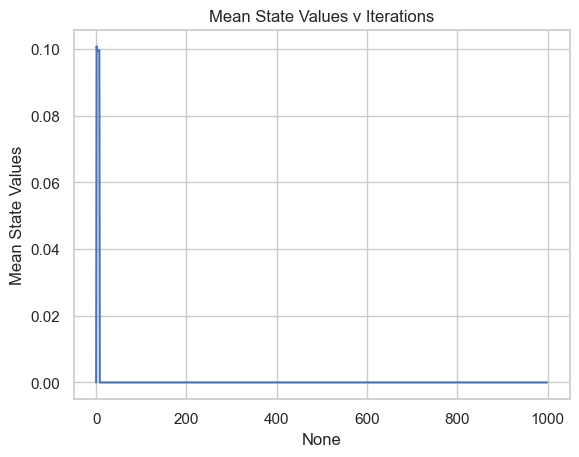

In [12]:
V, V_track, pi, conv_track = Planner(blackjack.P).value_iteration(gamma=0.05)

# test_scores = TestEnv.test_env(env=blackjack.env, render=False, pi=pi, user_input=False,
                                # convert_state_obs=blackjack.convert_state_obs)

max_value_per_iter = np.mean(V_track, axis=1)

Plots.v_iters_plot(max_value_per_iter, "Mean State Values")
# plt.plot(conv_track)

In [15]:
# Q, V, pi, Q_track, pi_track = RL(blackjack.env).q_learning(blackjack.n_states, blackjack.n_actions,
                                                            # blackjack.convert_state_obs, gamma=0.5)

# test_scores = TestEnv.test_env(env=blackjack.env, render=False, pi=pi, user_input=False,
                                # convert_state_obs=blackjack.convert_state_obs)

# max_value_per_iter = np.mean(Q_track, axis=1)

# Plots.v_iters_plot(max_value_per_iter, "Mean State Values")

# plt.plot(test_scores)